<a href="https://colab.research.google.com/github/ShivinM-17/Boston-dataset-neural-networks-regression/blob/main/boston_dataset_neuralnetwork_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston Housing price prediction using neural networks

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000                     

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's




### Importing the necessary libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Checking details about the columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All columns are numerical variables, either (float64 or int64)

In [5]:
data.shape

(506, 14)

Checking some statistical info of the dataset

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory data analysis
Finding relationships between the features to know more about the data

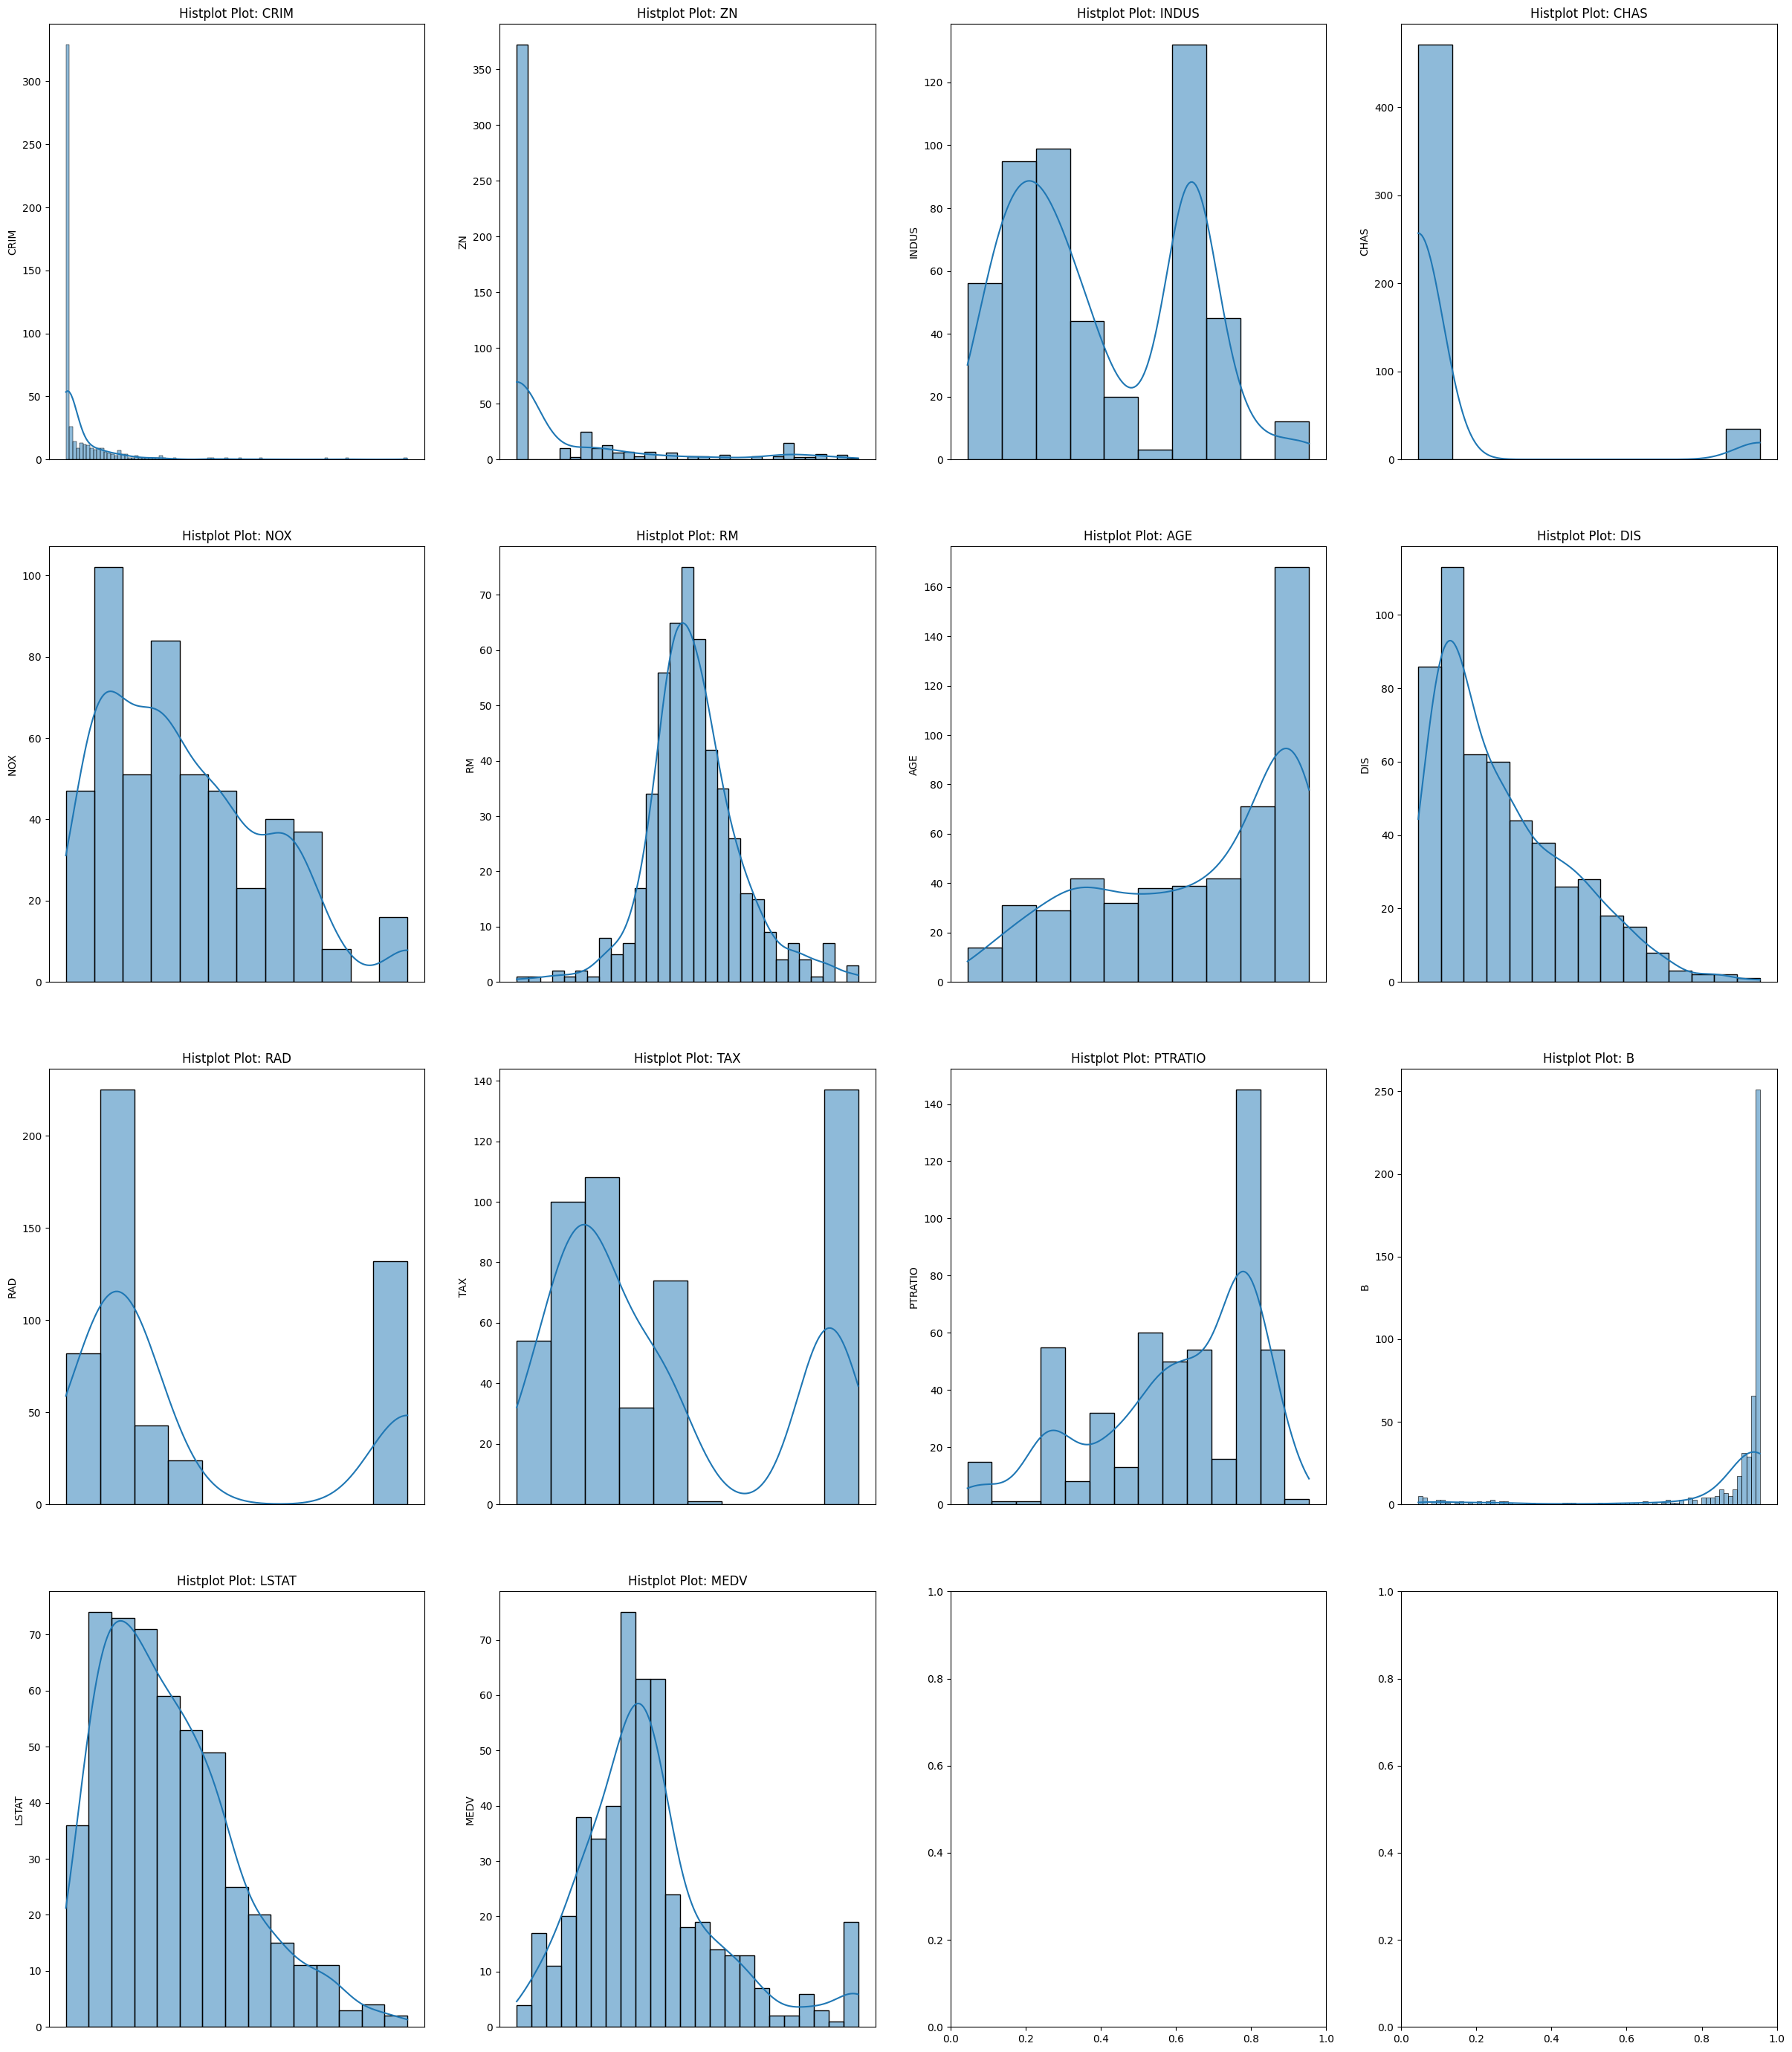

In [7]:
# Making a figure grid for plotting box-plots
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 35))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(data=data, x=column, ax=ax, kde=True)
    ax.set_ylabel(column)
    ax.set_xlabel('')
    ax.set_title(f'Histplot Plot: {column}')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

From the plots, we can see that columns CRM, ZN, CHAS, B are highly skewed, while the other columns have either normal and bimodel curves of distribution. Also, we see that the column CHAS is highly skewed at both left and right. The outcome column MEDV seems to have a normal distribution.

In [8]:
skewed_cols = ["CRIM", "ZN","B"]
normal_biv_cols = [i for i in data.columns if i not in skewed_cols]

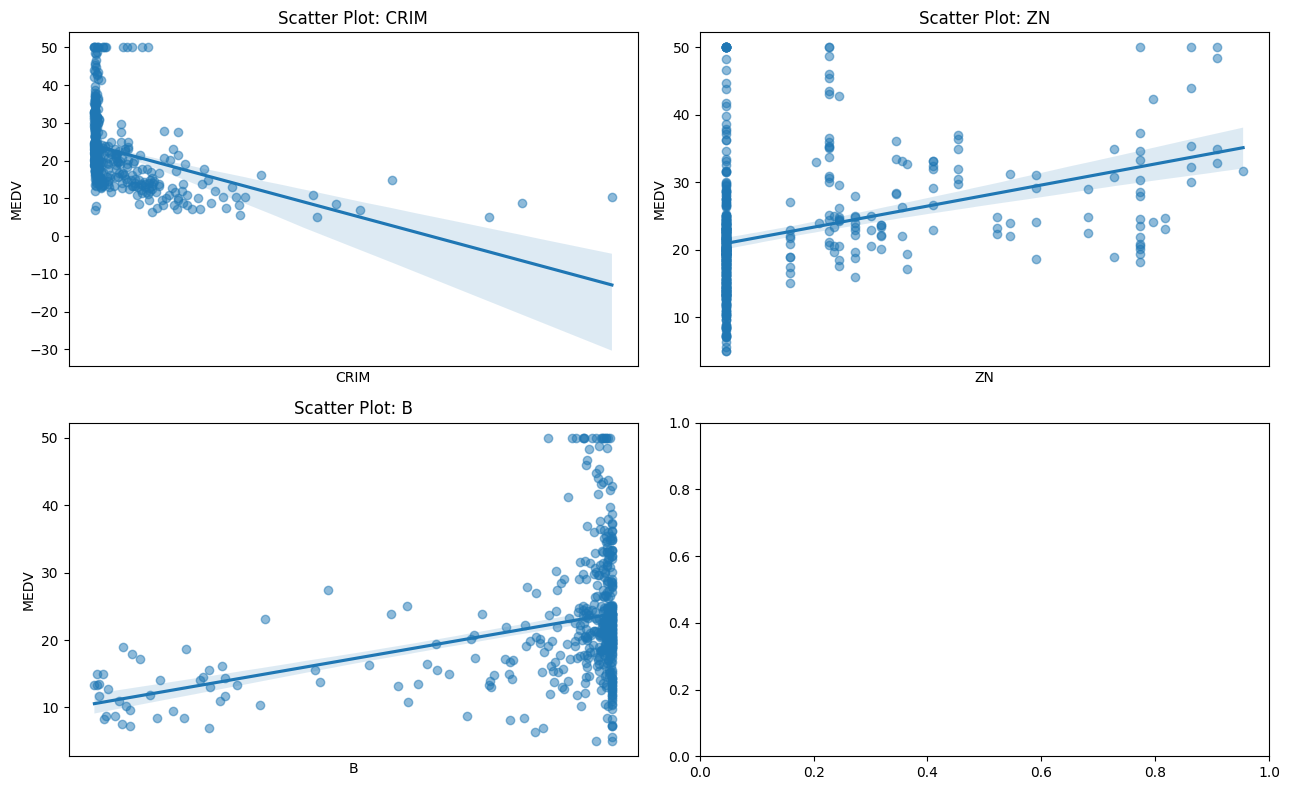

In [9]:
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13,8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(skewed_cols):
    ax = axes[i]
    sns.regplot(data=data, y='MEDV', x=column, ax=ax, scatter_kws={'alpha':0.5})
    ax.set_ylabel('MEDV')
    ax.set_xlabel(column)
    ax.set_title(f'Scatter Plot: {column}')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout()
plt.show()

As expected, we can see that crime rates affect the overall prices of the houses, decreasing them. While for the other features, there doesn't seem to be a significant changes because of the steep increasing graph, still the prices still increase to an extent.

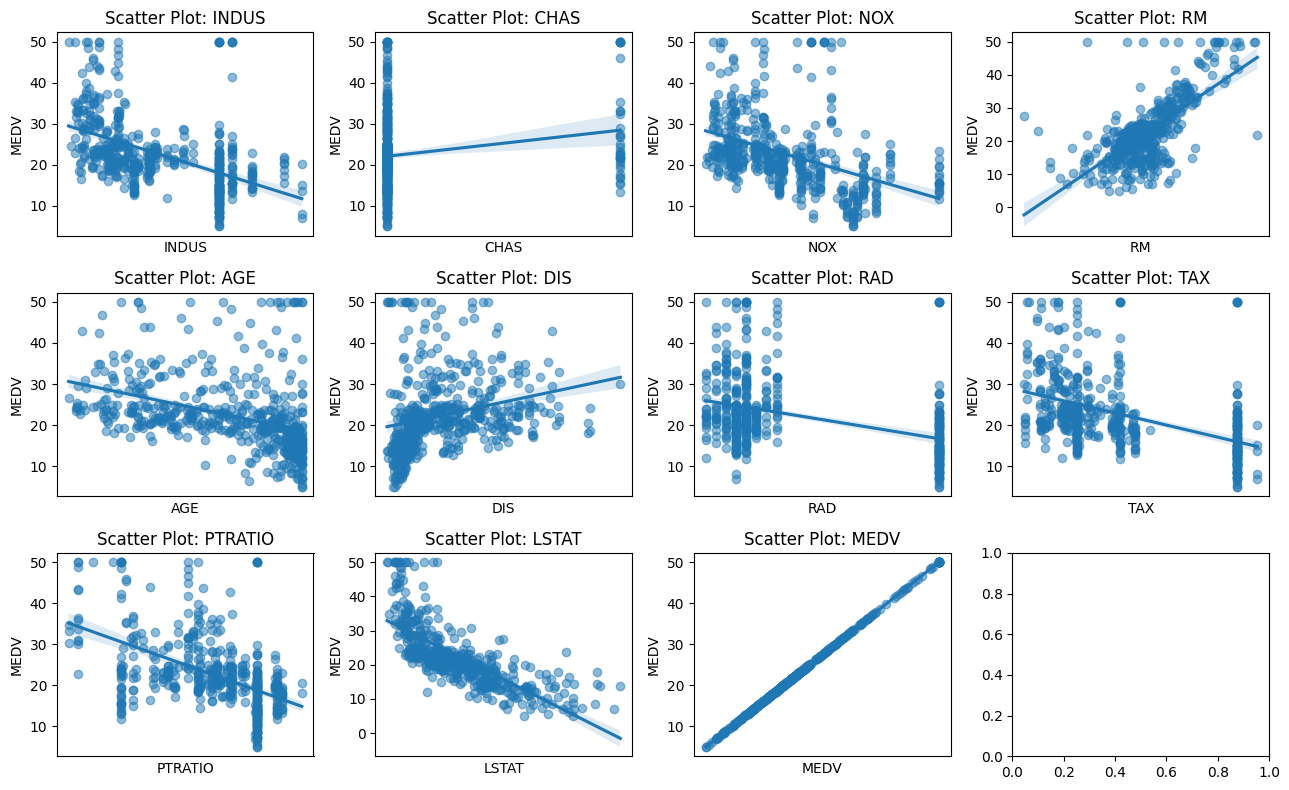

In [10]:
# Now, getting relationship for rest of the features with MEDV
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13,8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(normal_biv_cols):
    ax = axes[i]
    sns.regplot(data=data, y='MEDV', x=column, ax=ax, scatter_kws={'alpha':0.5})
    ax.set_ylabel('MEDV')
    ax.set_xlabel(column)
    ax.set_title(f'Scatter Plot: {column}')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout()
plt.show()

**Insights**                                                                    
* LSTAT - there seems to be a decrease in house prices in areas of lower status population.
* RM - house prices are much higher, with increasing no. of rooms in the houses.
* DIS - same is the case with this features, but more employment centres nearby, prices also increase accordingly
* While other features tend to make a decrease in house prices, be it a steep decrease for some features, but this may change if there is presence of outliers.



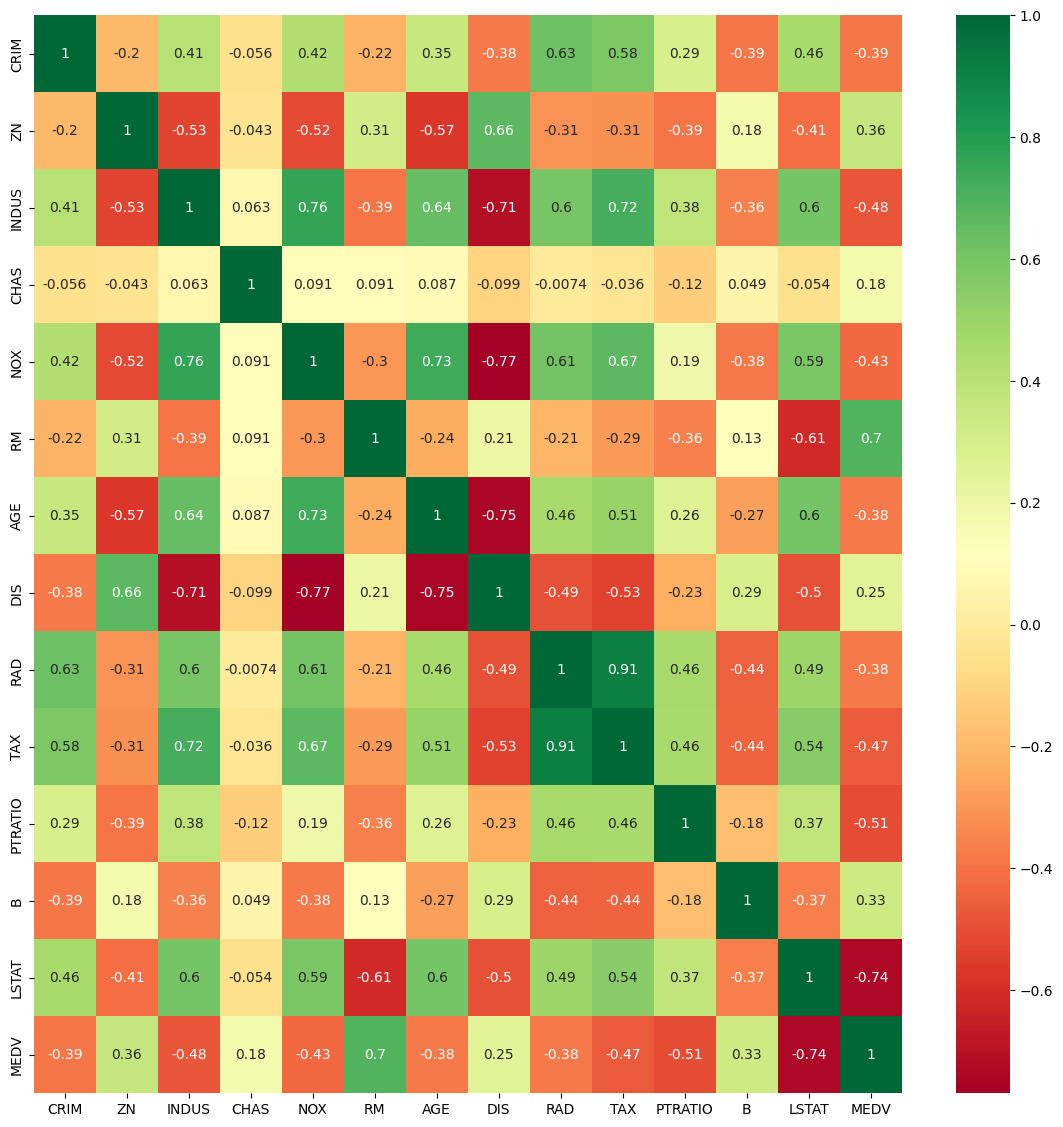

In [11]:
#get correlations of each features in dataset
corrmat = data.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(14,14))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* The column DIS seems to be highly correlated with the a few columns with positive correlation > 0.60 and negative correlation < -0.50. But does seem to have a slight impact on the dependent variable (MEDV).                        
* Also, LSTAT seems to be highly negatively correlated with MEDV which is true since with areas with less lower status people, this may refer to an area with higher mean salary and quality of life, thus there may be increase in prices.
* TAX also seems to be highly correlated to RAD, INDUS, LSTAT, AGE, NOX, while it is quite negatively correlated with MEDV. With increase in taxes due to availabilty of services and quality, this make to a increase in price range of houses.

### Data preprocessing

#### Checking for missing values

In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There doesn't seem to be any missing values in the dataset

### Checking for outliers in the data

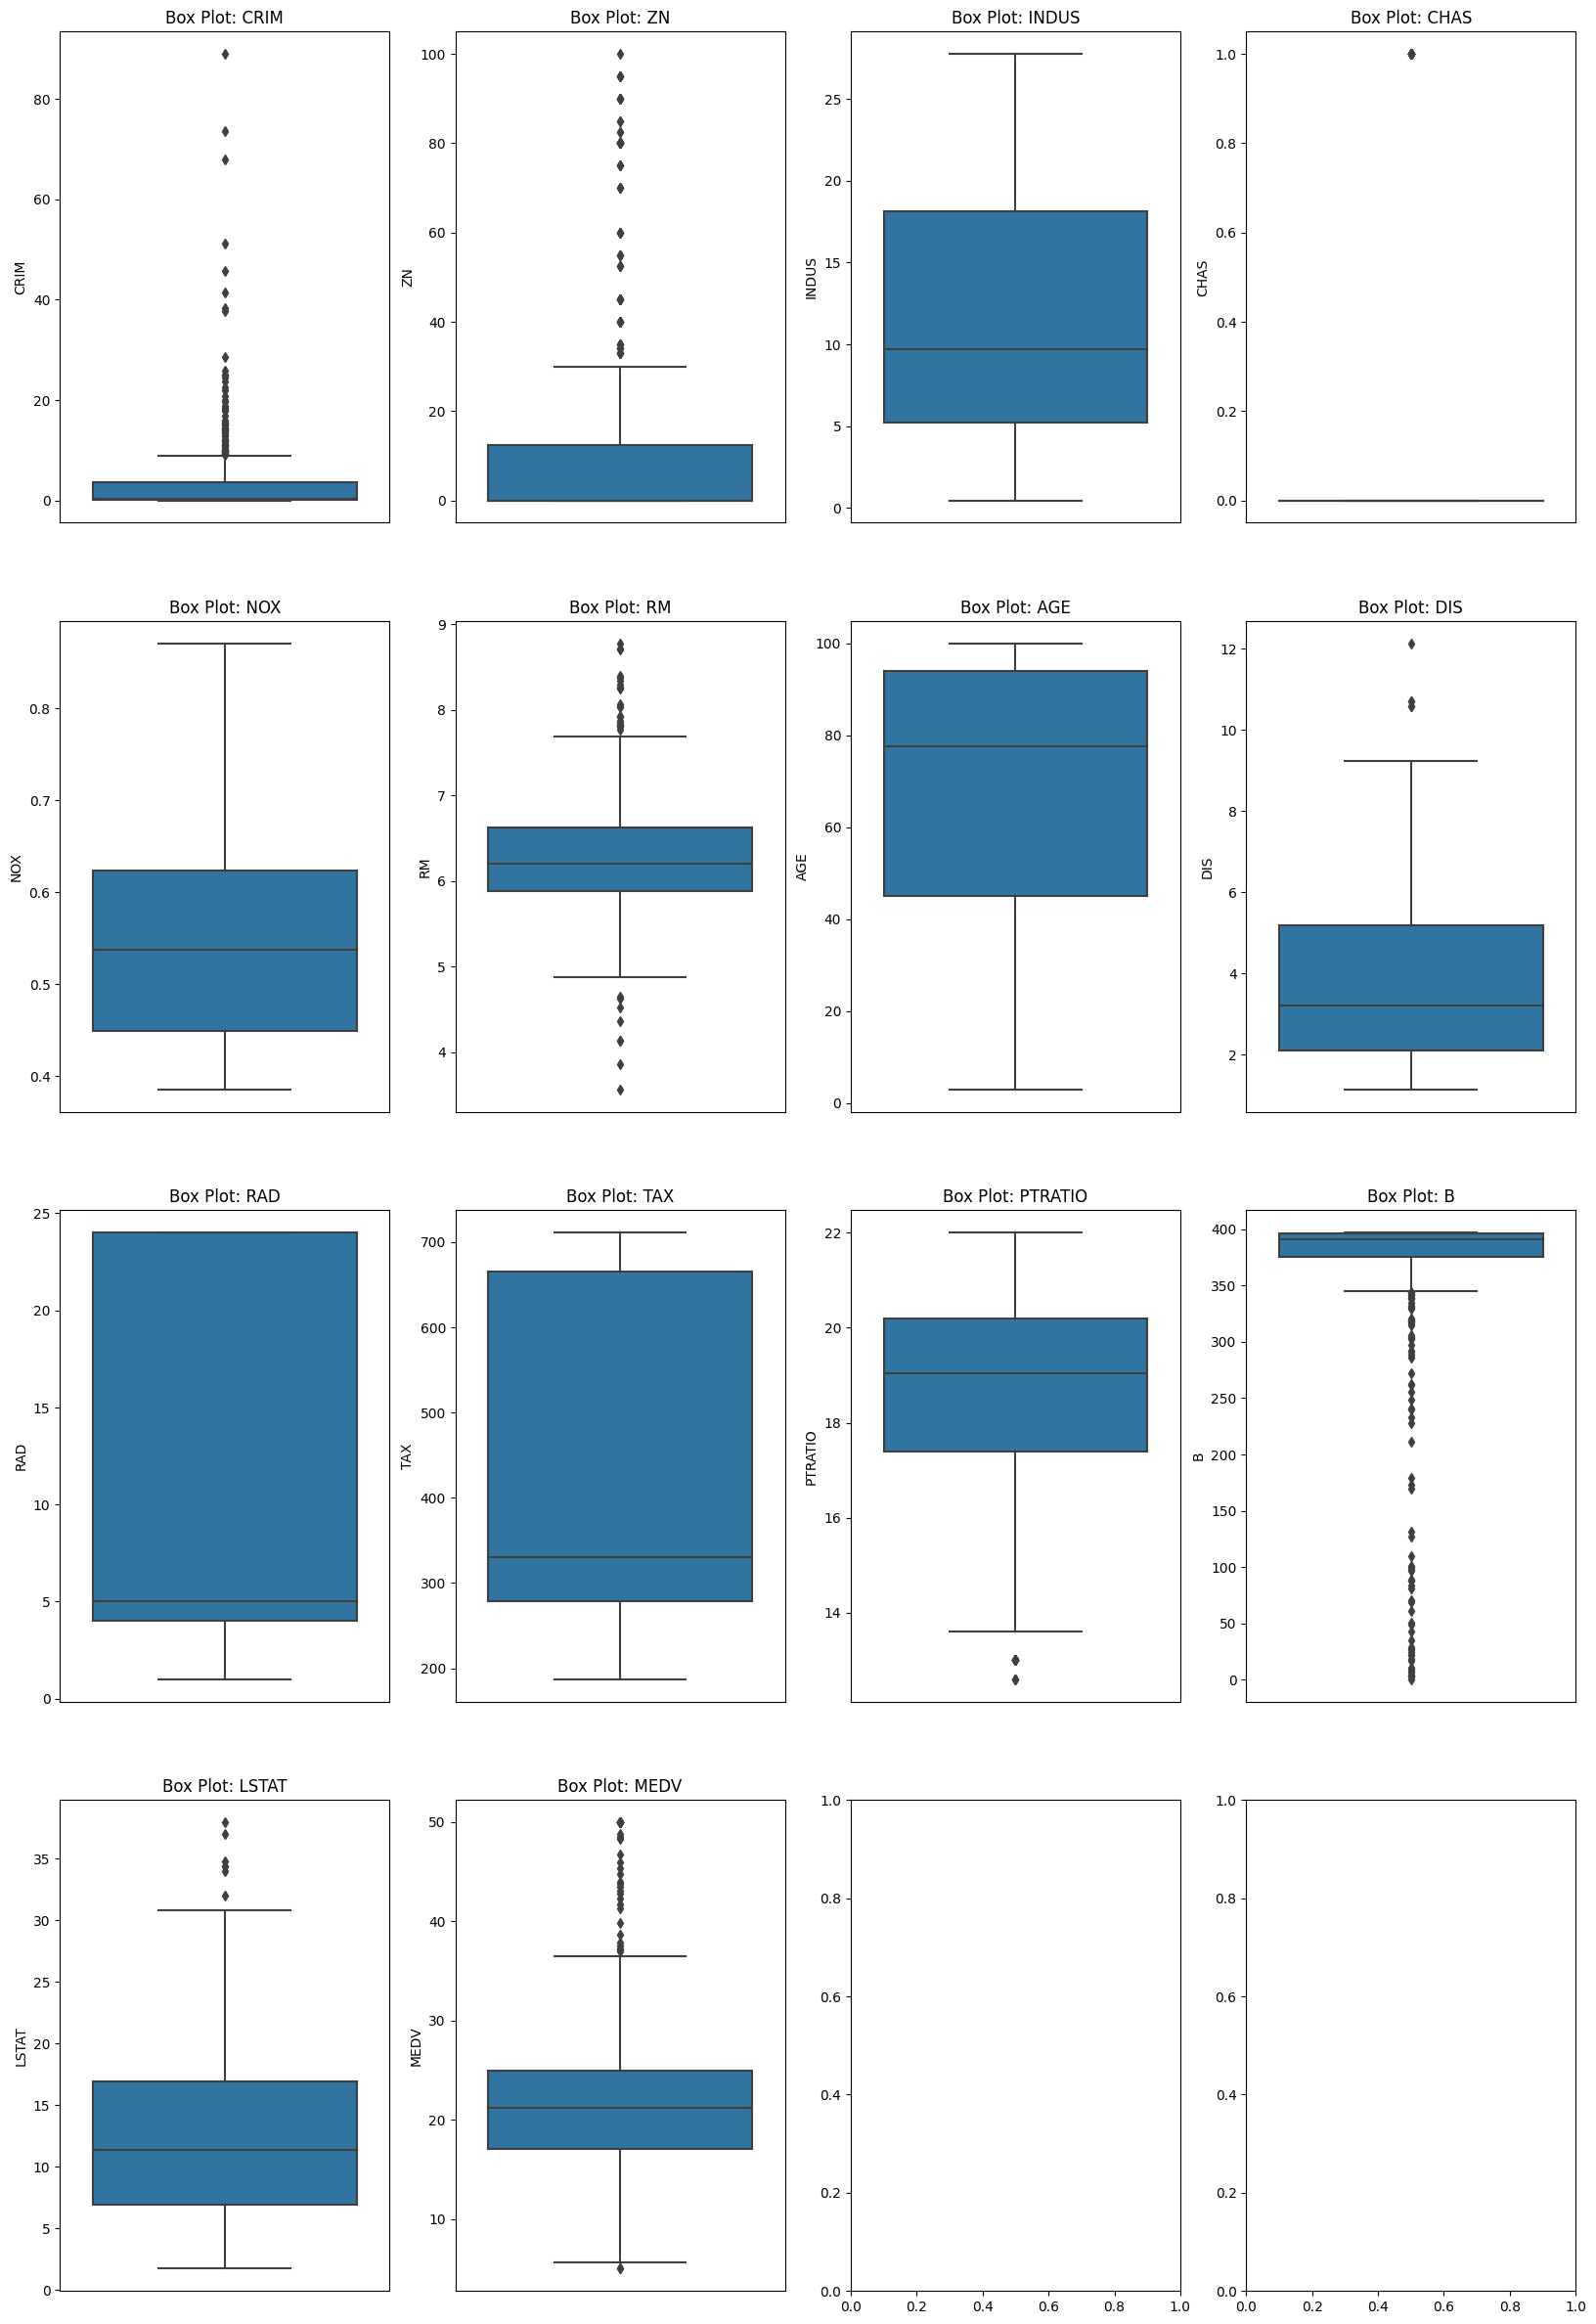

In [13]:
# Making boxplots for each features
# Making a figure grid for plotting box-plots
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))


# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.boxplot(data=data, y=column, ax=ax)
    ax.set_ylabel(column)
    ax.set_xlabel('')
    ax.set_title(f'Box Plot: {column}')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

* Even though the column CRIM does seem to have many outliers, but this features tend to increase in areas with less security and forces, and laws. Thus, this may be an important feature for prediction.
* There is no need to check CHAS feature, since it is a binary feature column (with values as 1 and 0)
* As we saw in the regplots in EDA section, here also, we can see that columns like RAD and TAX seems to be highly skewed, while AGE and INDUS do seem to have a little skewness.
* The proportion of blacks (column - B) do have many outliers, but this may be due to various social, economic or environmental factors, which are difficult to predict here as of now.                                                   
                                                                          

In [14]:
# Transforming the skewed data using log transformations

# making epsilon to avoid divide by zero in log transformation
epsilon = 1e-10
data["B"] = np.log(data["B"] + epsilon)

skewed_data = ["CRIM","ZN"]
data[skewed_data] = np.log(data[skewed_data]+epsilon)

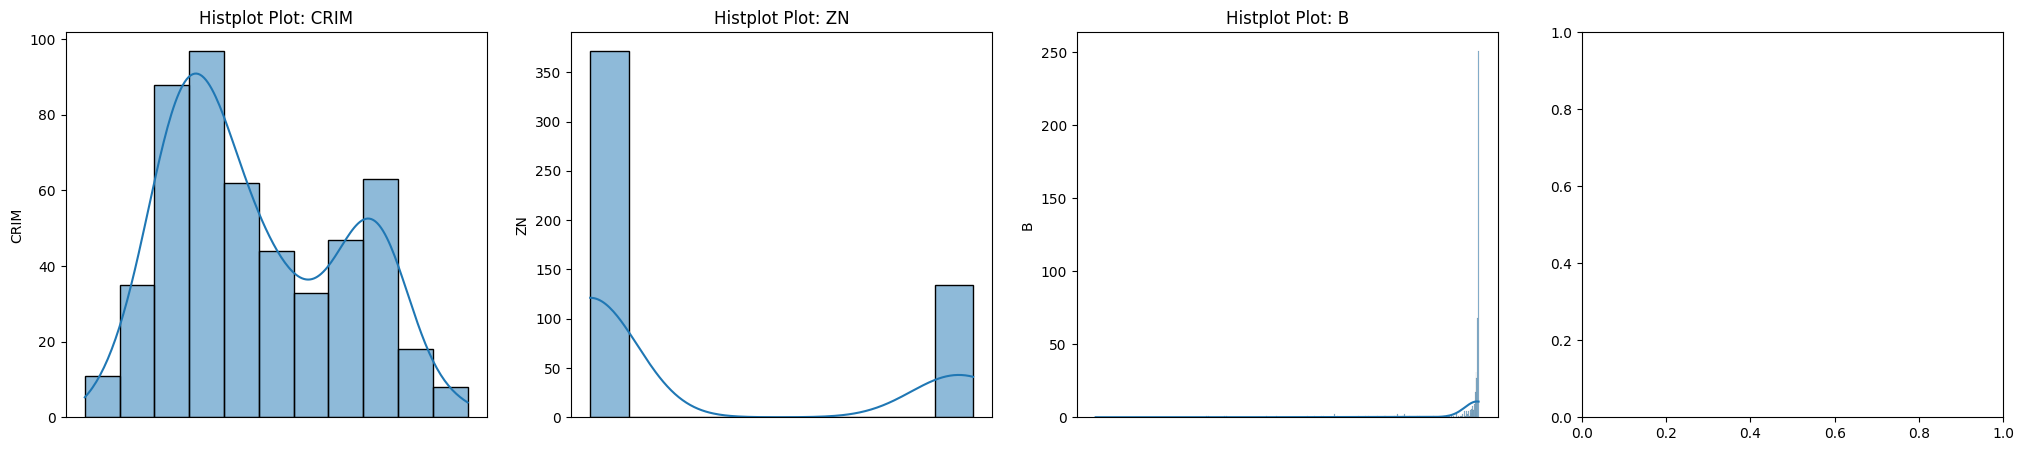

In [15]:
# Making a figure grid for plotting box-plots
num_rows = 1
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(skewed_cols):
    ax = axes[i]
    sns.histplot(data=data, x=column, ax=ax, kde=True)
    ax.set_ylabel(column)
    ax.set_xlabel('')
    ax.set_title(f'Histplot Plot: {column}')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

### Feature scaling

In [16]:
# Performing standardisation on the data
feature_scale=[feature for feature in data.columns if feature not in ['MEDV']]

# We'll be performing StandardScaler technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[feature_scale])

StandardScaler()

In [17]:
scaler.transform(data[feature_scale])

array([[-1.98322811,  1.60775035, -1.2879095 , ..., -1.45900038,
         0.3025923 , -1.0755623 ],
       [-1.30563885, -0.59995743, -0.59338101, ..., -0.30309415,
         0.3025923 , -0.49243937],
       [-1.30597804, -0.59995743, -0.59338101, ..., -0.30309415,
         0.28925293, -1.2087274 ],
       ...,
       [-0.93540227, -0.59995743,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.98304761],
       [-0.662329  , -0.59995743,  0.11573841, ...,  1.17646583,
         0.29129387, -0.86530163],
       [-1.05026732, -0.59995743,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.66905833]])

In [18]:
data = pd.concat([data[['MEDV']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [19]:
data.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,-1.983228,1.607750,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.302592,-1.075562
1,21.6,-1.305639,-0.599957,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.302592,-0.492439
2,34.7,-1.305978,-0.599957,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.289253,-1.208727
3,33.4,-1.226942,-0.599957,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.295169,-1.361517
4,36.2,-0.876187,-0.599957,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.302592,-1.026501


### Splitting the data

In [20]:
# # Before splitting, it seems that the float64 are in string format in auto mode
# # Convert them to floaat32
# l = [i for i in data.columns if data[i].dtype=='float64']
# data[l] = data[l].astype('float32')

In [21]:
X = data.drop(columns = ['MEDV'], axis = 1)
y = data['MEDV']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.33, random_state=42)


In [23]:
X_train, y_train

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 478  1.438046 -0.599957  1.015999 -0.272599  0.512296 -0.141945  1.000145   
 26   0.177232 -0.599957 -0.437258 -0.272599 -0.144217 -0.671918  0.772557   
 7   -0.534139  1.576688 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
 492 -0.655077 -0.599957  2.422565 -0.272599  0.469104 -0.429726  0.530745   
 108 -0.590363 -0.599957 -0.375976 -0.272599 -0.299707  0.269781  1.014369   
 ..        ...       ...       ...       ...       ...       ...       ...   
 106 -0.455799 -0.599957 -0.375976 -0.272599 -0.299707 -0.639151  0.829454   
 270 -0.197388  1.616726 -0.609431 -0.272599 -0.783454 -0.610658 -0.941463   
 348 -1.582750  1.734819 -1.331682 -0.272599 -1.033965  0.499151 -1.382414   
 435  1.478212 -0.599957  1.015999 -0.272599  1.600725  0.490603  0.925467   
 102 -0.321608 -0.599957 -0.375976 -0.272599 -0.299707  0.171480  0.598310   
 
           DIS       RAD       TAX   PTRATIO         B     LST

### Model Training

#### Model 1 (Without hyperparameterization)

In [24]:
# Creating a random seed
tf.random.set_seed(42)

# Creating the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(14),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear")
])

# Compiling the model
model1.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
              metrics=["mse","mae",tf.keras.metrics.RootMeanSquaredError()])

# Fitting the data into the model
history = model1.fit(X_train, y_train, epochs=512)



Epoch 1/512
11/11 [==============================] - 5s 10ms/step - loss: 630.3026 - mse: 630.3026 - mae: 20.3926 - root_mean_squared_error: 25.1058
Epoch 2/512
11/11 [==============================] - 0s 10ms/step - loss: 483.7175 - mse: 483.7175 - mae: 19.6849 - root_mean_squared_error: 21.9936
Epoch 3/512
11/11 [==============================] - 0s 8ms/step - loss: 89.5787 - mse: 89.5787 - mae: 7.0283 - root_mean_squared_error: 9.4646
Epoch 4/512
11/11 [==============================] - 0s 10ms/step - loss: 36.3447 - mse: 36.3447 - mae: 4.4723 - root_mean_squared_error: 6.0287
Epoch 5/512
11/11 [==============================] - 0s 10ms/step - loss: 24.6280 - mse: 24.6280 - mae: 3.6362 - root_mean_squared_error: 4.9627
Epoch 6/512
11/11 [==============================] - 0s 10ms/step - loss: 17.2392 - mse: 17.2392 - mae: 3.0977 - root_mean_squared_error: 4.1520
Epoch 7/512
11/11 [==============================] - 0s 8ms/step - loss: 14.7903 - mse: 14.7903 - mae: 2.8158 - root_mean_s

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 50)                750       
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 150)               15150     
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 250)               25250     
                                                                 
 dense_6 (Dense)             (None, 50)                1

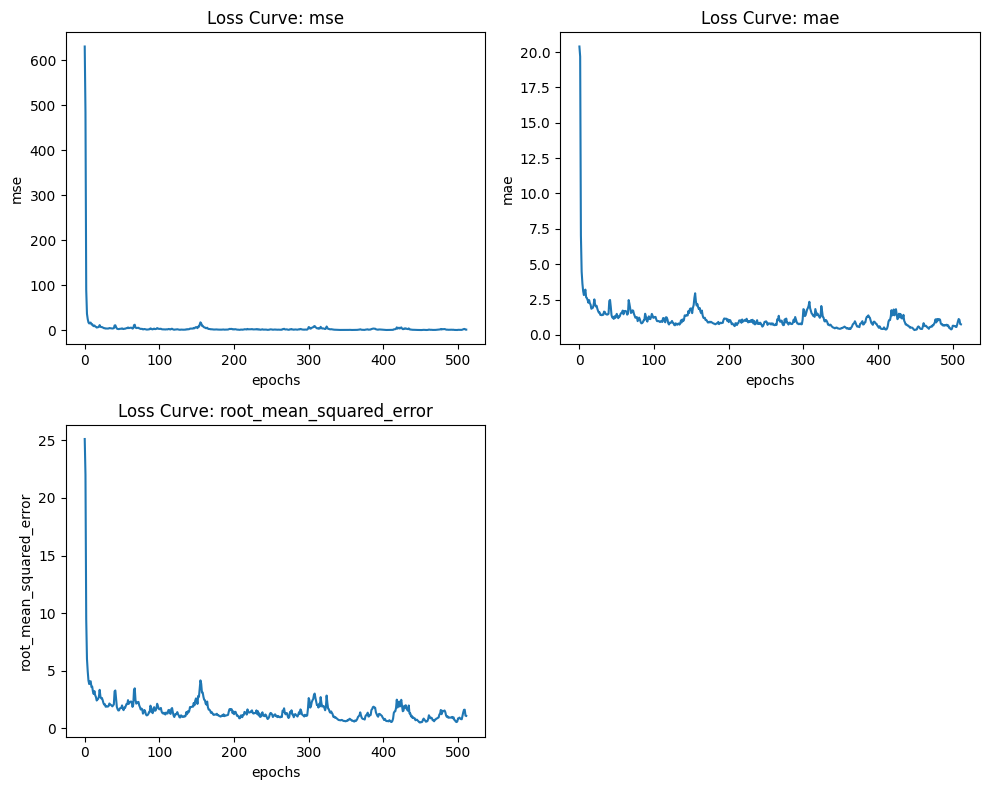

In [26]:
his = pd.DataFrame(history.history)

history_columns = [i for i in his.columns if i!='loss']

num_plots = len(history_columns)
num_cols = 2
num_rows = (num_plots + 1) // 2  # Ceiling division to ensure enough rows

# Create subplots for each column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the columns and plot individual loss curves
for i, column in enumerate(history_columns):
    ax = axes[i]
    ax.plot(his.index, his[column])
    ax.set_xlabel("epochs")
    ax.set_ylabel(column)
    ax.set_title(f"Loss Curve: {column}")

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [27]:
# evaluating this model (before hyperparameterization)
model1.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 9.8187 - mse: 9.8187 - mae: 2.1030 - root_mean_squared_error: 3.1335


[9.818662643432617, 9.818662643432617, 2.102999448776245, 3.133474588394165]

We can see that our model gives out the following performance metrics.
* mse - 10.7098
* mae - 2.1510
* rmse - 3.2725                                                  
Now, that this model was made without any hyperparameterization, we will make a neural network with hyperparameters applied.

#### Model 2 (With hyperparameterization)

In [28]:
# Install keras-tuner
!pip install -U keras-tuner

In [29]:
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Dropout
import keras_tuner as kt

In [30]:
def build_model(hp):
  model = Sequential()
  model.add(layers.Flatten())
  counter = 0

  # Iterating it for 1 to 10 layers
  for i in range(hp.Int('num_layers',min_value=1,max_value=15)):
    if counter == 0:
      # Adding appropriate number of nodes in the layer
      model.add(Dense(hp.Int('units' + str(i), min_value=1, max_value=512,step=8),
                             activation= "relu",
                             input_dim=8))

      # Adding appropriate dropout layer
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0])))

    else:
      # Adding number of nodes to be added in the layer
      model.add(Dense(hp.Int('units' + str(i), min_value=1, max_value=512,step=8),
                      activation= "relu"))

      # Adding range of values for dropout layer
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0])))
    counter+=1

  # Output layer
  model.add(Dense(1,activation='linear'))

  # Finding the best optimizer
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
                  loss=tf.keras.metrics.RootMeanSquaredError(),
                  metrics=['mse','mae',tf.keras.metrics.RootMeanSquaredError()])
  return model

In [31]:
# Making the tuner variable, which will help to find the best model
tuner = kt.RandomSearch(build_model,
                        objective='mse',
                        max_trials=10,
                        directory='mydir',
                        project_name='num_layers')

In [32]:
# getting the summary of the tuner
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 512, 'step': 8, 'sampling': 'linear'}
dropout0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'ordered': True}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
dropout1 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'ordered': True}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
dropout2 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'ordered': True}
units3 (I

In [33]:
# Now, searching for the best hyperparameters
tuner.search(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

In [38]:
# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Getting the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Evaluate the best model on the test set
evaluation = best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 3.0795 - mse: 11.2837 - mae: 2.2917 - root_mean_squared_error: 3.3591


In [39]:
# Printing the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

Best Hyperparameters:
num_layers: 2
units0: 193
dropout0: 0.6
optimizer: adam
units1: 96
dropout1: 0.4
units2: 88
dropout2: 0.6
units3: 112
dropout3: 0.5
units4: 24
dropout4: 0.2


In [44]:
# Retrieving the evaluation metrics/losses
loss = evaluation[0]
metrics = evaluation[1:]
ls = ["Mean squared error", "Mean absolute error", "Root mean squared error"]

print("Best Model Evaluation:")
print(f"Loss: {loss}\n")
print("Metrics:")
for i, metric in enumerate(metrics[:-1]):
    print(f"{ls[i]}: {metric}")

Best Model Evaluation:
Loss: 3.079530954360962

Metrics:
Mean squared error: 11.28368854522705
Mean absolute error: 2.2916810512542725
Root mean squared error: 3.3591201305389404
